**Лабораторная работа №5.** Применение сверточных нейронных сетей (бинарная классификация)


1.   Загрузите данные. Разделите исходный набор данных на обучающую, валидационную и контрольную выборки.
2.   Реализуйте глубокую нейронную сеть с как минимум тремя сверточными слоями. Какое качество классификации получено?
3.   Примените дополнение данных (data augmentation). Как это повлияло на качество классификатора? 
4.   Поэкспериментируйте с готовыми нейронными сетями (например, AlexNet, VGG16, Inception и т.п.), применив передаточное обучение. Как это повлияло на качество классификатора?
Какой максимальный результат удалось получить на сайте Kaggle? Почему?





In [0]:
# Install Kaggle library
!pip install -q kaggle

import os
os.environ['KAGGLE_USERNAME'] = "awful1996" # username from the json file
os.environ['KAGGLE_KEY'] = "5e55f76a1cc7a4772bd7803cba8fb2c1" # key from the json file
#!kaggle datasets download -d iarunava/happy-house-dataset # api copied from kaggle
!kaggle competitions download -c dogs-vs-cats

 98% 533M/543M [00:04<00:00, 164MB/s]
100% 543M/543M [00:04<00:00, 137MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 91.6MB/s]
 98% 265M/271M [00:01<00:00, 160MB/s]
100% 271M/271M [00:01<00:00, 161MB/s]


In [0]:
!unzip train.zip
!unzip test1.zip

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
import tensorflow_datasets as tfds

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

main_dir = ""
train_dir = "train"
path = os.path.join(main_dir,train_dir)
print(path)

train


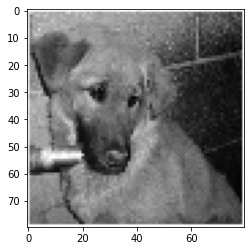

In [0]:
for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize=(80, 80))
    plt.imshow(new_img_array,cmap="gray")
    break

In [0]:
X = []
y = []
convert = lambda category : int(category == 'dog')
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize=(80, 80))
        X.append(new_img_array)
        y.append(category)
create_test_data(path)
X = np.array(X).reshape(-1, 80,80,1)
y = np.array(y)

#Normalize data
X = X/255.0

from sklearn.model_selection import train_test_split
X, X_test, y, y_test = train_test_split(X, y, test_size=0.1)
X, X_val, y, y_val = train_test_split(X, y, test_size=0.1)





In [0]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True, validation_split=0.1)
datagen.fit(X)

**Задание 2.**
Реализуйте глубокую нейронную сеть с как минимум тремя сверточными слоями. Какое качество классификации получено?

Качество 53 процента


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit(
    X,y, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    callbacks=[
      tf.keras.callbacks.EarlyStopping(
        patience=10,
        restore_best_weights=True
      )
    ]
)


Epoch 1/100
570/570 [==============================] - 6s 10ms/step - loss: 0.6837 - accuracy: 0.5525 - val_loss: 0.6195 - val_accuracy: 0.6741
Epoch 2/100
570/570 [==============================] - 5s 10ms/step - loss: 0.5979 - accuracy: 0.6765 - val_loss: 0.5795 - val_accuracy: 0.6849
Epoch 3/100
570/570 [==============================] - 5s 9ms/step - loss: 0.5155 - accuracy: 0.7451 - val_loss: 0.5229 - val_accuracy: 0.7373
Epoch 4/100
570/570 [==============================] - 5s 9ms/step - loss: 0.4658 - accuracy: 0.7771 - val_loss: 0.4455 - val_accuracy: 0.7995
Epoch 5/100
570/570 [==============================] - 5s 10ms/step - loss: 0.4206 - accuracy: 0.8052 - val_loss: 0.4145 - val_accuracy: 0.7946
Epoch 6/100
570/570 [==============================] - 6s 10ms/step - loss: 0.3904 - accuracy: 0.8187 - val_loss: 0.3973 - val_accuracy: 0.8089
Epoch 7/100
570/570 [==============================] - 5s 10ms/step - loss: 0.3616 - accuracy: 0.8388 - val_loss: 0.3840 - val_accuracy: 0

In [0]:
_, acc = model.evaluate(X_test, y_test)
print(f'Accuracy = {acc:.5f}')

79/79 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.8364
Accuracy = 0.83640


**Задание 3.**
Примените дополнение данных (data augmentation). Как это повлияло на качество классификатора? 

Качество модели понизилось до 59 процентов


In [0]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
model.fit_generator(
    datagen.flow(X, y, batch_size=32),
    steps_per_epoch=len(X) / 32, 
    epochs=100, 
    callbacks=[
      tf.keras.callbacks.EarlyStopping(
        patience=2,
        restore_best_weights=True,
        monitor='accuracy'
      )
    ])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
633/632 [==============================] - 14s 22ms/step - loss: 0.6941 - accuracy: 0.5403
Epoch 2/100
633/632 [==============================] - 14s 22ms/step - loss: 0.6341 - accuracy: 0.6421
Epoch 3/100
633/632 [==============================] - 14s 22ms/step - loss: 0.5796 - accuracy: 0.6940
Epoch 4/100
633/632 [==============================] - 14s 22ms/step - loss: 0.5407 - accuracy: 0.7278
Epoch 5/100
633/632 [==============================] - 14s 22ms/step - loss: 0.5067 - accuracy: 0.7519
Epoch 6/100
633/632 [==============================] - 14s 22ms/step - loss: 0.4779 - accuracy: 0.7702
Epoch 7/100
633/632 [==============================] - 14s 22ms/step - loss: 0.4584 - accuracy: 0.7824
Epoch 8/100
633/632 [==============================] - 14s 22ms/step - loss: 0.4381 - accuracy: 0.7960
Epoch 9/100
633/632 [==============================] - 14s 22ms/step - loss: 0.4286 - accuracy: 0.79

In [0]:
_, acc = model.evaluate(X_test, y_test)
print(f'Accuracy = {acc:.5f}')

79/79 [==============================] - 0s 4ms/step - loss: 0.6999 - accuracy: 0.5980
Accuracy = 0.59800


**Задание 4.**
Поэкспериментируйте с готовыми нейронными сетями (например, AlexNet, VGG16, Inception и т.п.), применив передаточное обучение. Как это повлияло на качество классификатора?
Какой максимальный результат удалось получить на сайте Kaggle? Почему?

Удалось получить результат 91 процент, так как MobileNet была обучена на данных ImageNet


In [0]:
from keras.applications import MobileNet
from keras.layers import GlobalAveragePooling2D, Dense
from keras.models import Model

base_model=MobileNet(weights='imagenet',include_top=False) 

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x)
preds=Dense(2,activation='softmax')(x) 
model=Model(inputs=base_model.input,outputs=preds)
model.summary()

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [0]:
import numpy as np
def transform(dataset):
  newDataset = list()
  for x in dataset:
    x = np.repeat(x, 3, 2)
    newDataset.append(x)
  return np.array(newDataset)

newTrainX = transform(X)

print(newTrainX.shape)

(20250, 80, 80, 3)


In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(newTrainX, y, validation_split=0.1, epochs=100, callbacks=[
      tf.keras.callbacks.EarlyStopping(
        patience=2,
        restore_best_weights=True,
        monitor='accuracy'
      )
    ]
)

Train on 18225 samples, validate on 2025 samples
Epoch 1/100
18225/18225 [==============================] - 40s 2ms/step - loss: 0.3213 - accuracy: 0.8714 - val_loss: 0.4389 - val_accuracy: 0.8341
Epoch 2/100
18225/18225 [==============================] - 35s 2ms/step - loss: 0.2064 - accuracy: 0.9198 - val_loss: 0.1841 - val_accuracy: 0.9284
Epoch 3/100
18225/18225 [==============================] - 35s 2ms/step - loss: 0.1565 - accuracy: 0.9402 - val_loss: 0.2012 - val_accuracy: 0.9240
Epoch 4/100
18225/18225 [==============================] - 34s 2ms/step - loss: 0.1232 - accuracy: 0.9514 - val_loss: 0.1932 - val_accuracy: 0.9195
Epoch 5/100
18225/18225 [==============================] - 34s 2ms/step - loss: 0.1017 - accuracy: 0.9624 - val_loss: 0.2306 - val_accuracy: 0.9235
Epoch 6/100
18225/18225 [==============================] - 34s 2ms/step - loss: 0.0878 - accuracy: 0.9671 - val_loss: 0.3484 - val_accuracy: 0.8869
Epoch 7/100
18225/18225 [==============================] - 34s 

In [0]:
newTestX = transform(X_test)
_, acc = model.evaluate(newTestX, y_test)
print(f'Accuracy = {acc:.5f}')

2500/2500 [==============================] - 1s 410us/step
Accuracy = 0.91080
